# Week6_atmosco2data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('co2_mlo.tsv',delimiter='\t')
data=df.to_numpy()
time=data[:,2]
co2=data[:,3]

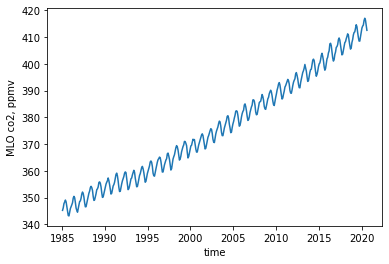

In [3]:
# let's plot from 1985
ind=(time>=1985)
plt.plot(time[ind],co2[ind])
plt.xlabel('time')
plt.ylabel('MLO co2, ppmv')
plt.show()

R2 = 0.98


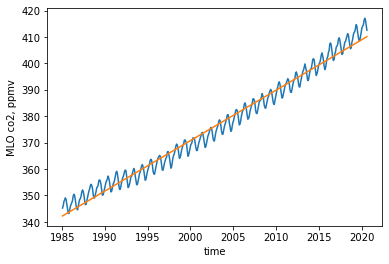

In [4]:
# Linear regression
# Matrix way
x=time[ind]
y=co2[ind]
N=np.size(x)
A=np.ones((N,2)) # N x 2 matrix
A[:,0]=x
xvec=np.linalg.pinv(A)@y
yest=A@xvec
r=np.corrcoef(yest,y)
print('R2 =',str((r[0,1]**2).round(2)))
# plot the result
plt.plot(x,y)
plt.plot(x,yest)
plt.xlabel('time')
plt.ylabel('MLO co2, ppmv')
plt.show()

R2 = 0.99


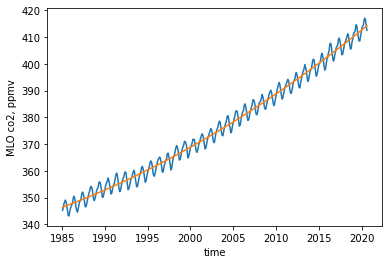

In [5]:
# Linear regression with quadratic term
x=time[ind]
y=co2[ind]
N=np.size(x)
A=np.ones((N,3)) # N x 3 matrix
A[:,0]=x**2
A[:,1]=x
xvec=np.linalg.pinv(A)@y
yest=A@xvec
r=np.corrcoef(yest,y)
print('R2 =',str((r[0,1]**2).round(2)))
# plot the result
plt.plot(x,y)
plt.plot(x,yest)
plt.xlabel('time')
plt.ylabel('MLO co2, ppmv')
plt.show()

R2 = 1.0


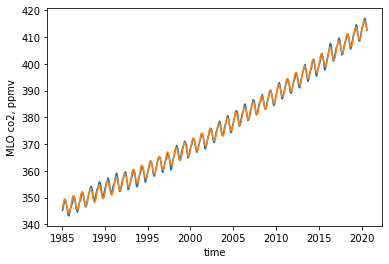

In [6]:
# Linear regression with quadratic term and sine/cosine with one year periodicity
# Matrix way
x=time[ind]
y=co2[ind]
N=np.size(x)
A=np.ones((N,5)) # N x 5 matrix
A[:,0]=x**2
A[:,1]=x
A[:,2]=np.cos(2*np.pi*x)
A[:,3]=np.sin(2*np.pi*x)
xvec=np.linalg.pinv(A)@y
yest=A@xvec
r=np.corrcoef(yest,y)
print('R2 =',str((r[0,1]**2).round(2)))
# plot the result
plt.plot(x,y)
plt.plot(x,yest)
plt.xlabel('time')
plt.ylabel('MLO co2, ppmv')
plt.show()